In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
import seaborn as sns

#setting random seed for reproducability. 
from numpy.random import seed
seed(2)
tf.keras.utils.set_random_seed(2)


#########################################################################################################
## This is the final classifier #########################################################################
## The value for these hyperparameters were decided based on the tests in the "testingPlayground" file ##
#########################################################################################################

#IMPORTANT: Notice that when we create this model we train on the entire training set,
#but in the playground we split the training data into training and validation data.
#This is the first time the test data is ever looked at!

#Loading dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#scale down to value between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print("Done loading datasets")

Done loading datasets


In [2]:
#######################################################
## Trainingt he model ####################
######################################################

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)
                                )
         )
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dropout(0.2, seed=4))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15)
model.save('digits-final-v3-tf')

Epoch 1/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1654 - accuracy: 0.9498
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0575 - accuracy: 0.9821
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0417 - accuracy: 0.9871
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0313 - accuracy: 0.9903
Epoch 5/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0237 - accuracy: 0.9920
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 8/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0138 - accuracy: 0.9950
Epoch 9/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0114 - accuracy: 0.9961
Epoch 10/15
1875/1875 [==============================] - 26s 14m

INFO:tensorflow:Assets written to: digits-final-v3-tf\assets


INFO:tensorflow:Assets written to: digits-final-v3-tf\assets


313/313 [==============================] - 1s 5ms/step - loss: 0.0326 - accuracy: 0.9940
0.0325603112578392 0.9940000176429749
313/313 [==============================] - 1s 4ms/step


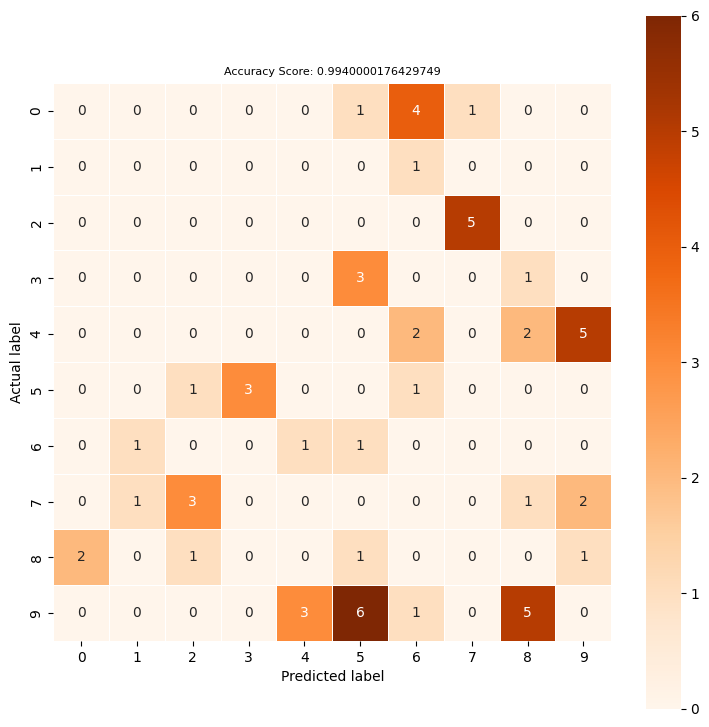

In [7]:
def cleanPredictions(predictions):
    _predictions = []
    for p in predictions:
        _predictions.append(np.argmax(p))
    return _predictions

def onlyShowErrors(_cm):
    cm = _cm
    for i in range(0,10):
        cm[i][i]=0
    return cm


loss, accuracy = model.evaluate(x_test, y_test)

print(loss, accuracy)
predictions = cleanPredictions(model.predict(x_test))
cm = metrics.confusion_matrix(y_test, predictions)
error_cm = onlyShowErrors(cm)

plt.figure(figsize=(9,9))
sns.heatmap(error_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 8);

313/313 [==============================] - 1s 4ms/step
Predicted: 5 - Actual: 9


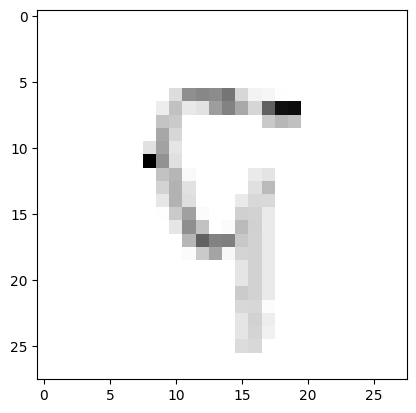

Predicted: 8 - Actual: 9


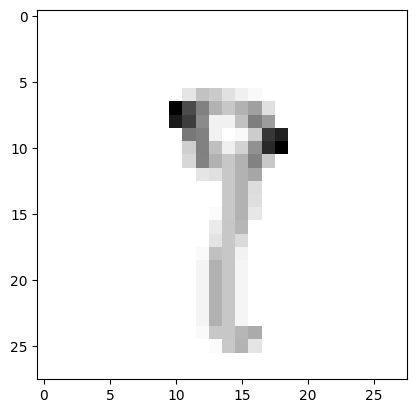

Predicted: 8 - Actual: 9


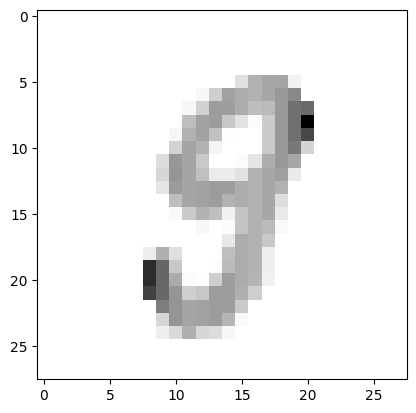

Predicted: 5 - Actual: 3


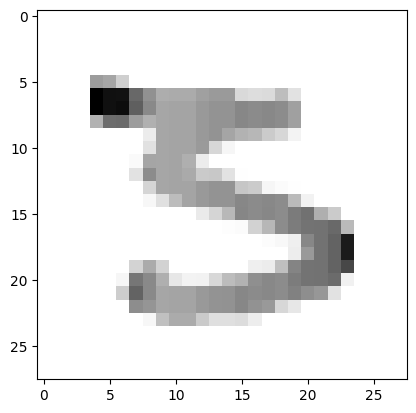

Predicted: 7 - Actual: 2


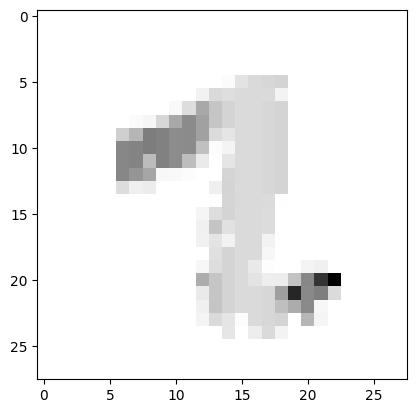

Predicted: 9 - Actual: 4


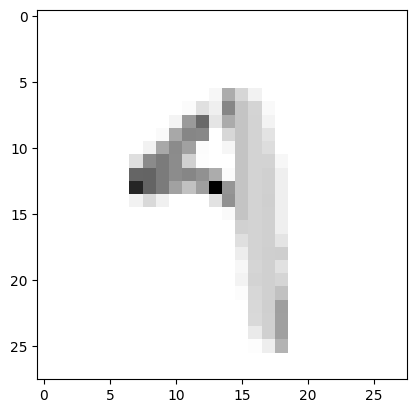

Predicted: 9 - Actual: 8


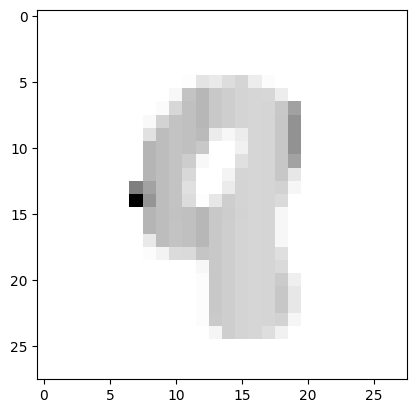

Predicted: 5 - Actual: 6


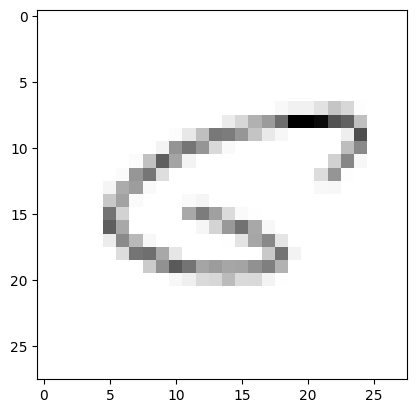

Predicted: 6 - Actual: 4


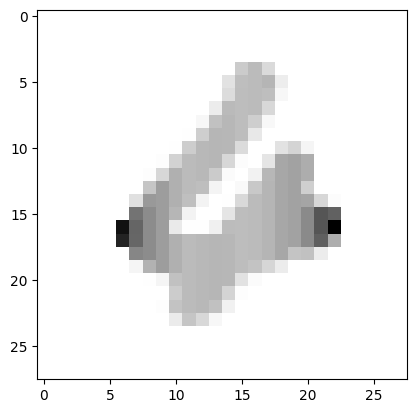

Predicted: 2 - Actual: 7


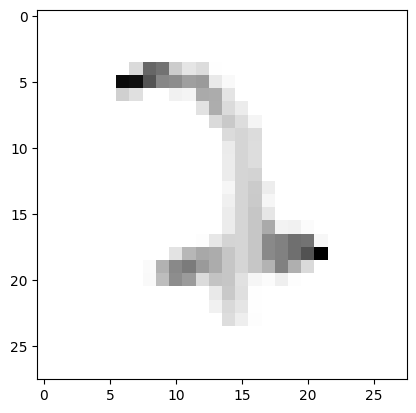

Predicted: 4 - Actual: 9


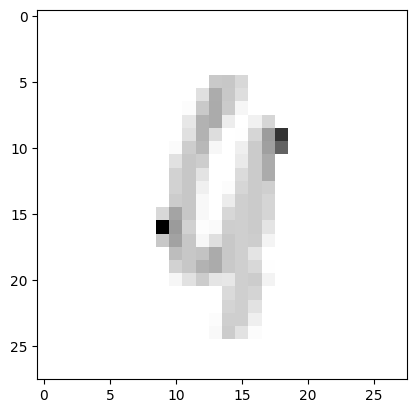

Predicted: 9 - Actual: 4


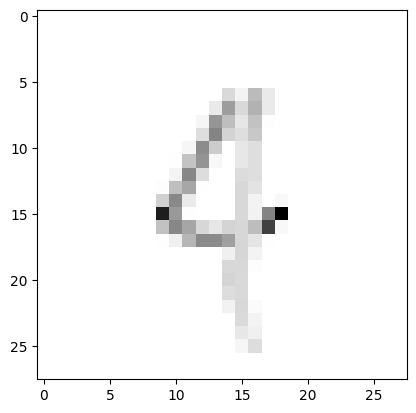

Predicted: 5 - Actual: 9


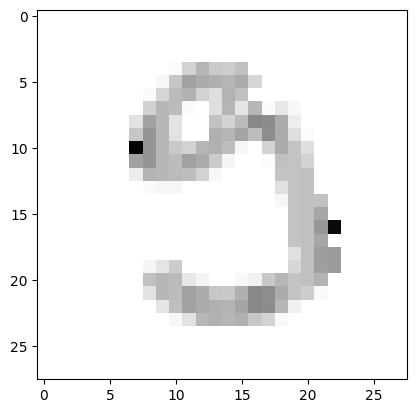

Predicted: 1 - Actual: 7


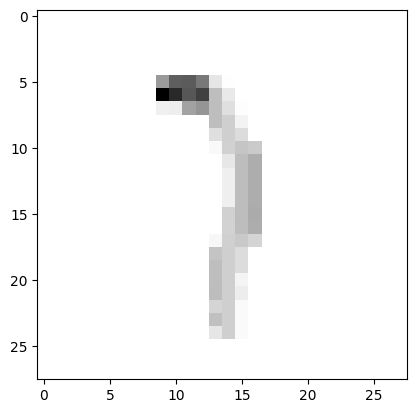

Predicted: 0 - Actual: 8


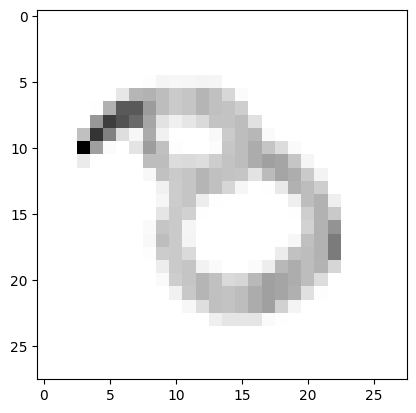

Predicted: 3 - Actual: 5


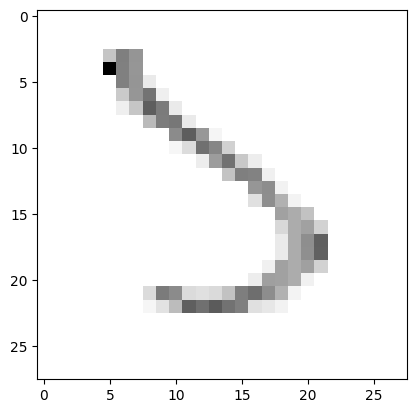

Predicted: 5 - Actual: 9


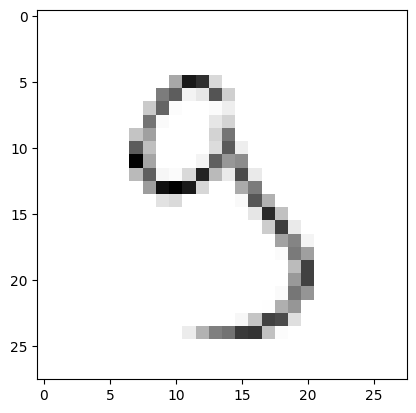

Predicted: 6 - Actual: 1


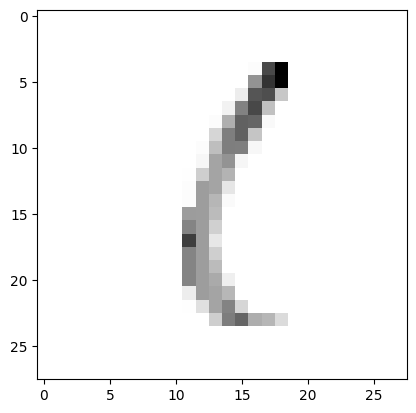

Predicted: 7 - Actual: 2


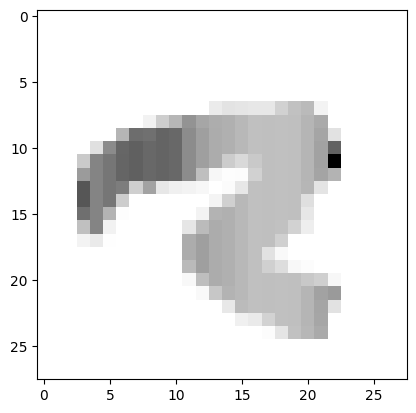

Predicted: 4 - Actual: 9


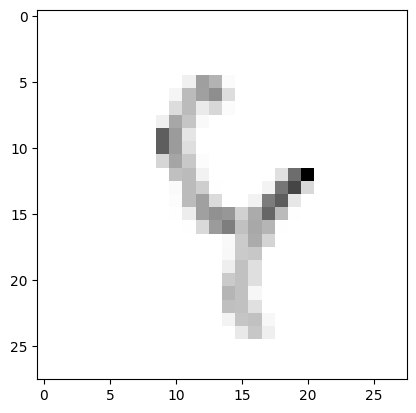

Predicted: 8 - Actual: 4


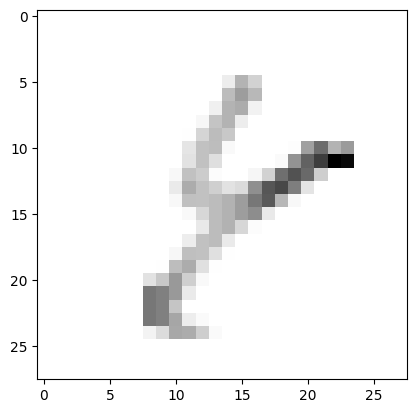

Predicted: 9 - Actual: 7


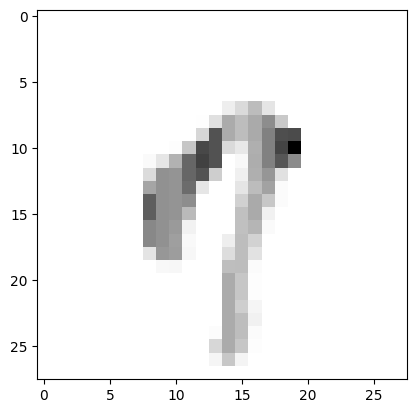

Predicted: 9 - Actual: 4


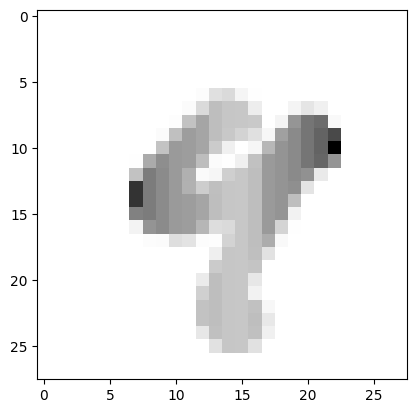

Predicted: 6 - Actual: 9


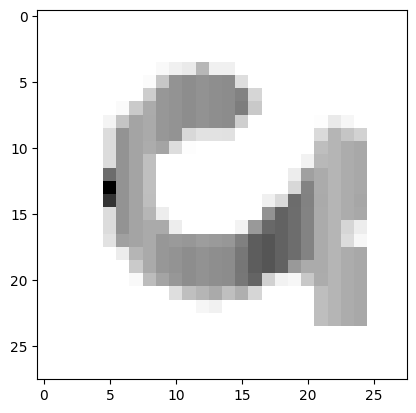

Predicted: 8 - Actual: 9


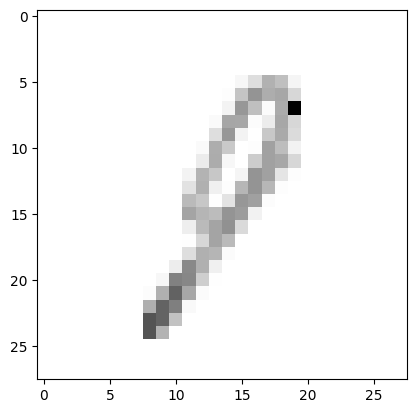

Predicted: 4 - Actual: 9


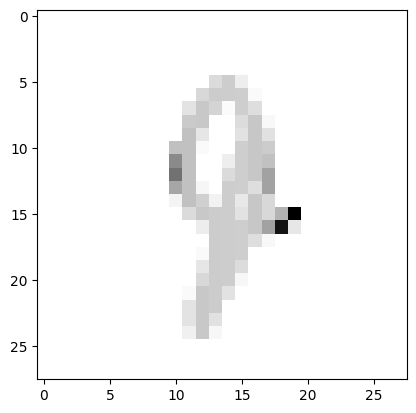

Predicted: 3 - Actual: 5


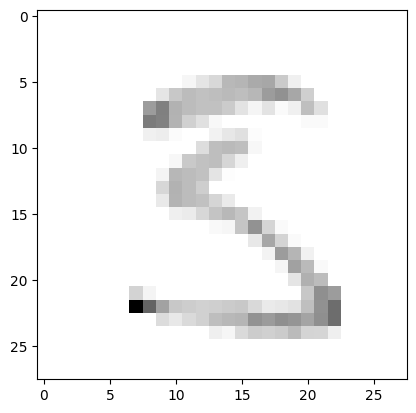

Predicted: 1 - Actual: 6


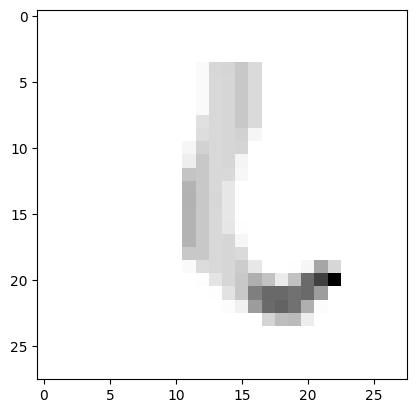

Predicted: 0 - Actual: 8


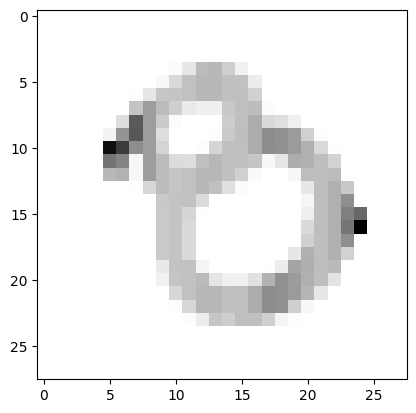

Predicted: 5 - Actual: 9


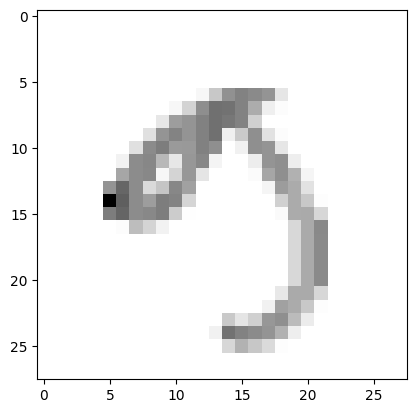

Predicted: 5 - Actual: 3


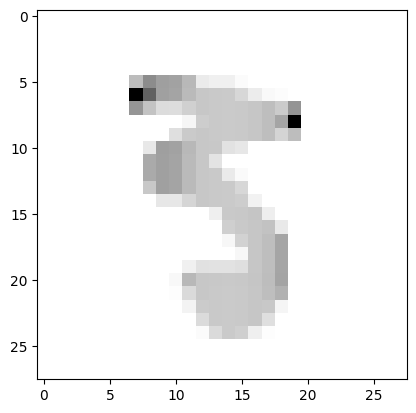

Predicted: 5 - Actual: 9


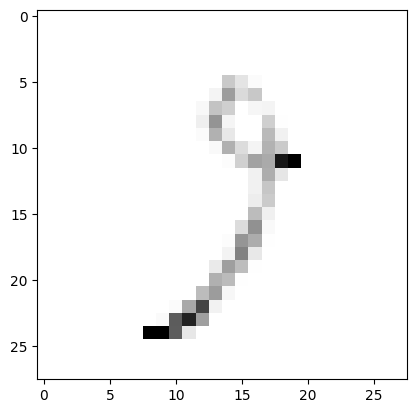

Predicted: 9 - Actual: 7


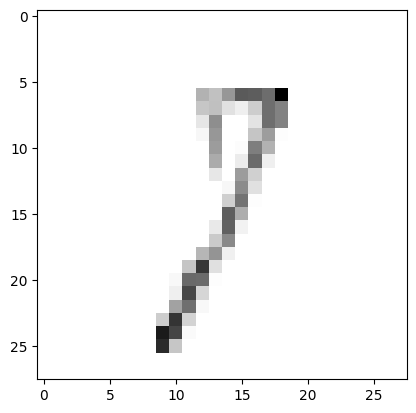

Predicted: 4 - Actual: 6


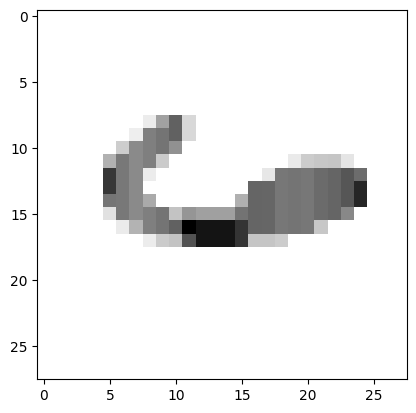

Predicted: 5 - Actual: 8


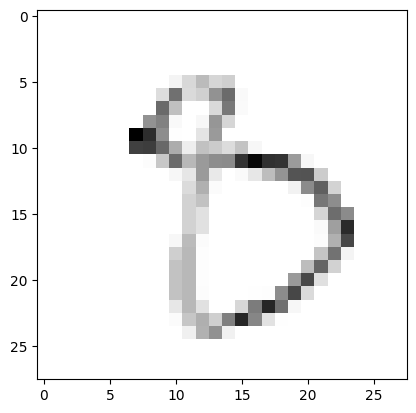

Predicted: 9 - Actual: 4


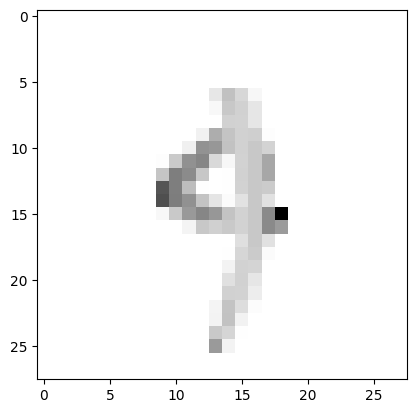

Predicted: 2 - Actual: 5


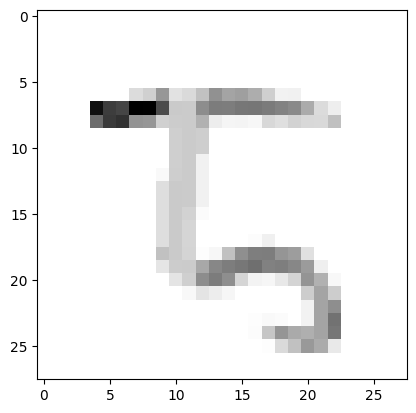

Predicted: 6 - Actual: 4


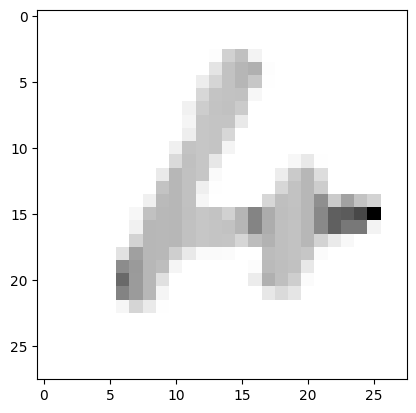

Predicted: 8 - Actual: 7


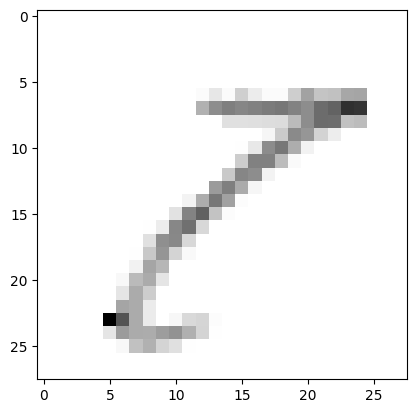

Predicted: 7 - Actual: 2


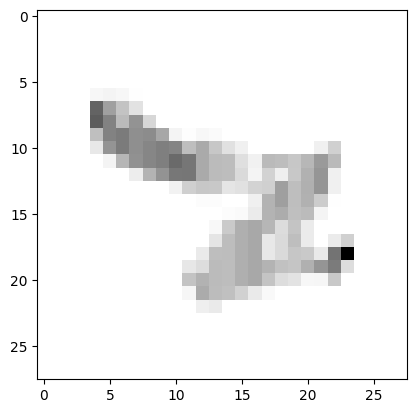

Predicted: 7 - Actual: 2


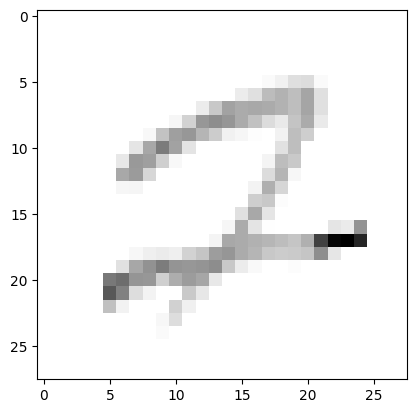

Predicted: 5 - Actual: 3


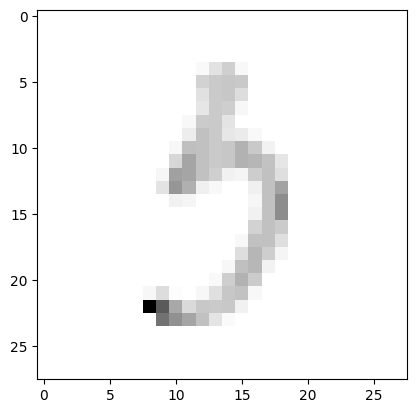

Predicted: 8 - Actual: 9


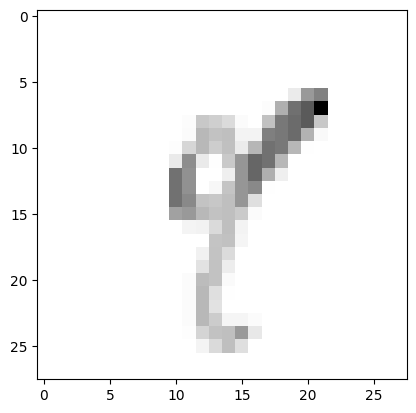

Predicted: 9 - Actual: 4


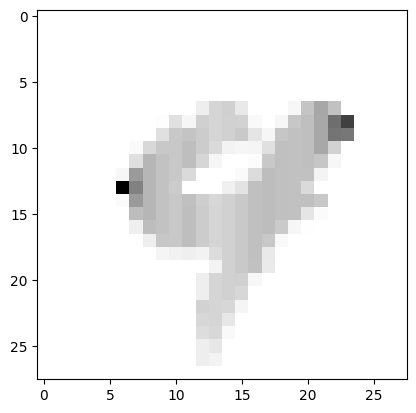

Predicted: 5 - Actual: 0


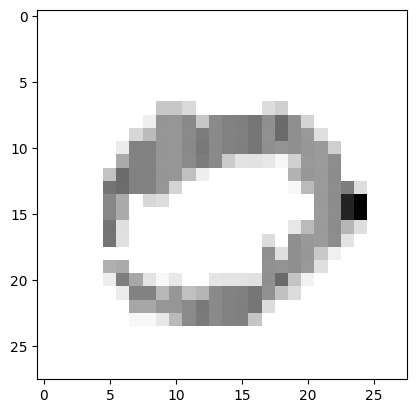

Predicted: 3 - Actual: 5


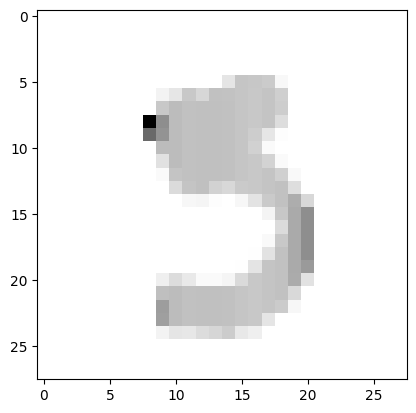

Predicted: 8 - Actual: 3


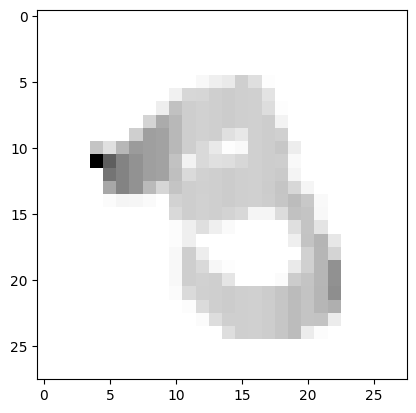

Predicted: 5 - Actual: 9


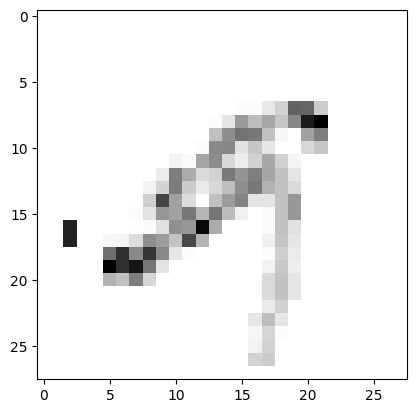

Predicted: 7 - Actual: 0


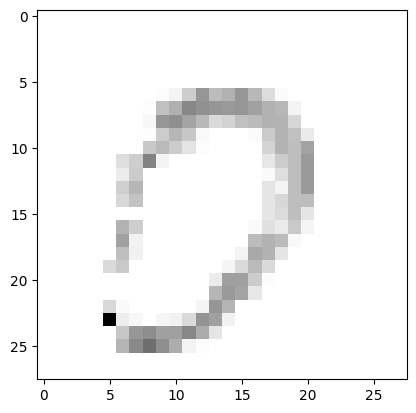

Predicted: 2 - Actual: 8


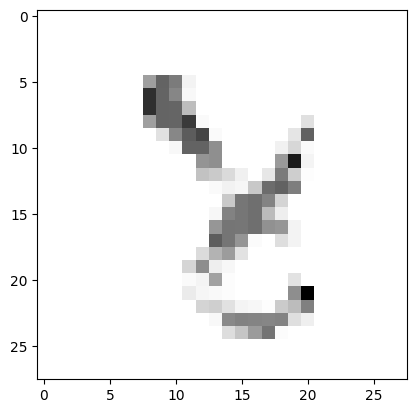

Predicted: 6 - Actual: 0


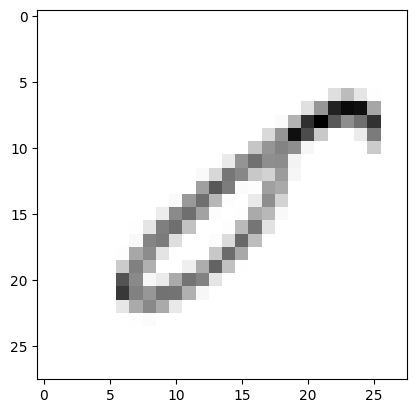

Predicted: 6 - Actual: 0


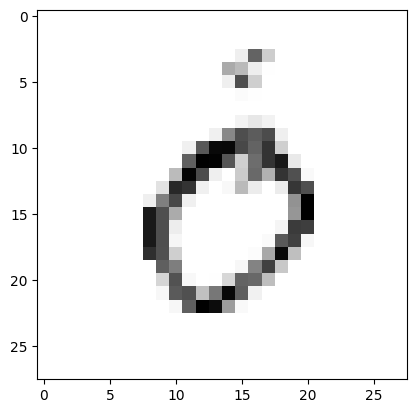

Predicted: 8 - Actual: 4


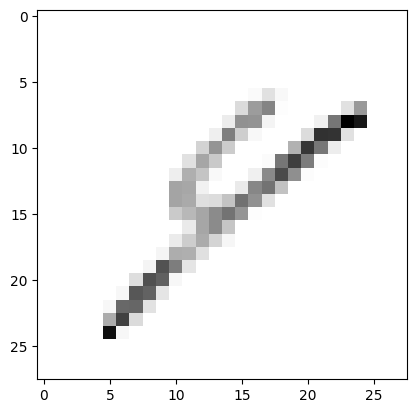

Predicted: 6 - Actual: 0


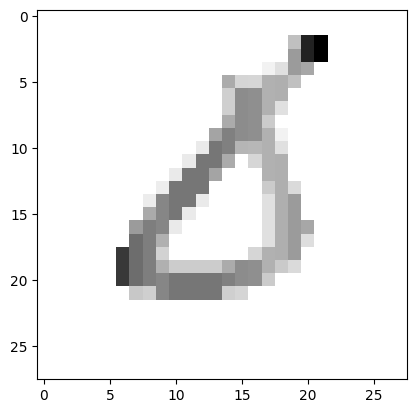

Predicted: 2 - Actual: 7


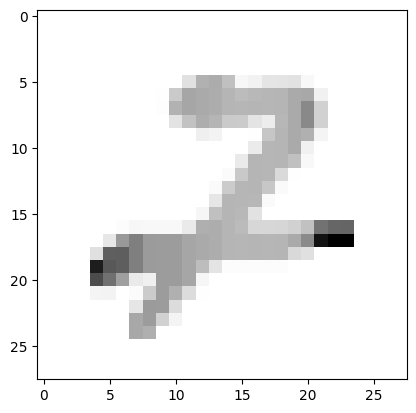

Predicted: 2 - Actual: 7


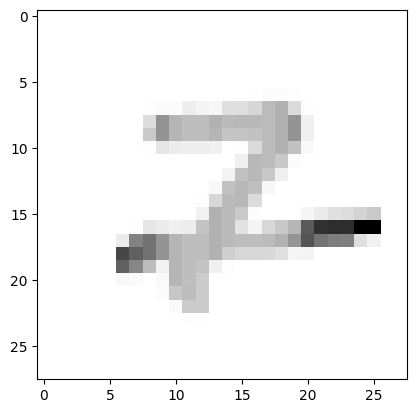

Predicted: 8 - Actual: 9


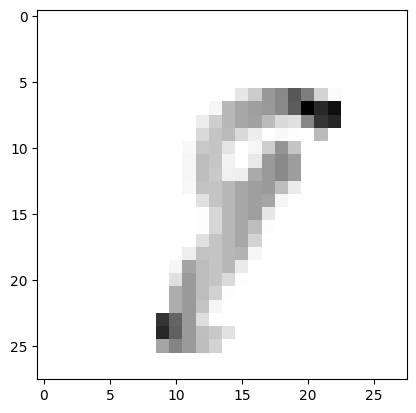

Predicted: 7 - Actual: 2


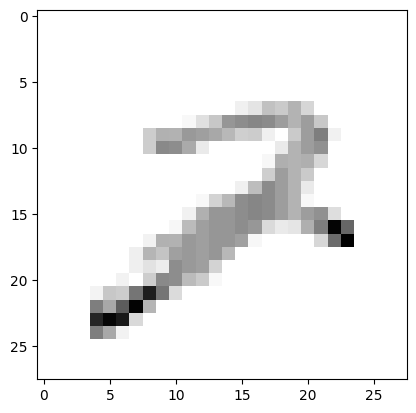

Predicted: 6 - Actual: 5


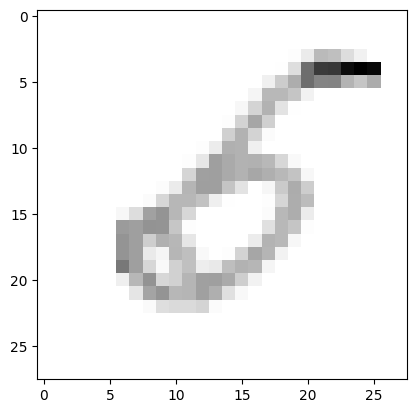

Predicted: 6 - Actual: 0


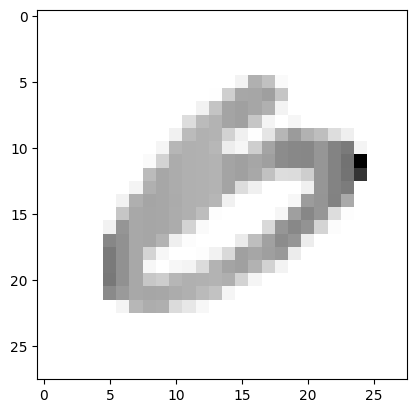

In [8]:


predictions = cleanPredictions(model.predict(x_test))

for i in range(0, len(y_test)-1):
    if predictions[i]!=y_test[i]:
        print("Predicted: {} - Actual: {}".format(predictions[i], y_test[i]))
        plt.imshow(x_test[i], cmap='Greys')
        plt.show()

